In [116]:
import pandas as pd
import numpy as np
import os

In [117]:
rootdir = 'c:\\Users\leey2\Amazon_Reviews'
all_reviews = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        df = pd.read_csv(os.path.join(subdir,file))
        df["Product"] = np.matlib.repmat(file,df.shape[0],1)
        all_reviews.append(df)
        print(df.head())
all_reviews_df = pd.concat(all_reviews)

                                      title  \
0               It is great for me overall!   
1               Easy straws for the elderly   
2                              4-5 time use   
3  You have to push the straw in very hard!   
4                          Difficult to use   

                                              review                star  \
0  Really good for me, with difficulty swallowing...  5.0 out of 5 stars   
1  It doesn’t work for me I have no suction my th...  1.0 out of 5 stars   
2                           They don’t last too long  3.0 out of 5 stars   
3  It helped my sister drink water again after ha...  5.0 out of 5 stars   
4                                  Difficult to use.  2.0 out of 5 stars   

               Product  
0  soupbionixthick.csv  
1  soupbionixthick.csv  
2  soupbionixthick.csv  
3  soupbionixthick.csv  
4  soupbionixthick.csv  
                                               title  \
0                   Mostly retired rehab nurse here.  

In [118]:
all_reviews_df

,title,review,star,Product
0,It is great for me overall!,"Really good for me, with difficulty swallowing...",5.0 out of 5 stars,soupbionixthick.csv
1,Easy straws for the elderly,It doesn’t work for me I have no suction my th...,1.0 out of 5 stars,soupbionixthick.csv
2,4-5 time use,They don’t last too long,3.0 out of 5 stars,soupbionixthick.csv
3,You have to push the straw in very hard!,It helped my sister drink water again after ha...,5.0 out of 5 stars,soupbionixthick.csv
4,Difficult to use,Difficult to use.,2.0 out of 5 stars,soupbionixthick.csv
...,...,...,...,...
121,Great spill-proof product!!,My dad used these cups when he was in an ortho...,5.0 out of 5 stars,soupsp.csv
122,Five Stars,Very helpful for my Mom,5.0 out of 5 stars,soupsp.csv
123,works great,I bought this cup for my father who is bedridd...,5.0 out of 5 stars,soupsp.csv
124,Great cup for elderly and surgery recovery!,Works as advertised. Very helpful following m...,5.0 out of 5 stars,soupsp.csv


In [119]:
list_of_products = all_reviews_df.Product.unique()

In [120]:
list_of_products

array(['soupbionixthick.csv', 'soupbionixthin.csv', 'soupikinsman.csv',
       'soupindependenceplastic.csv', 'soupirije.csv',
       'soupiweightedbase.csv', 'soupkirimon.csv', 'soupprovale.csv',
       'soupsafestrawthick.csv', 'soupsafestrawthin.csv',
       'soupsammons.csv', 'soupsp.csv'], dtype=object)

In [121]:
from textblob import TextBlob
import matplotlib.pyplot as plt

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


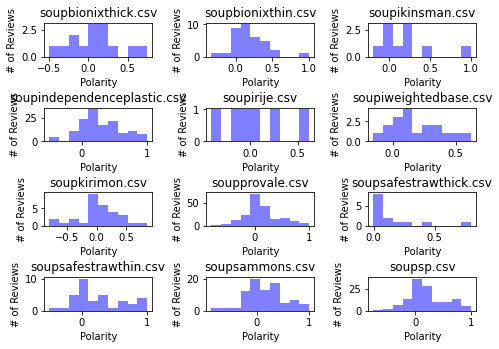

In [122]:
fig = plt.figure()
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub_data_frame['polarity'] = sub_data_frame['review'].apply(pol)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Polarity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.5, hspace = 1.5)

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


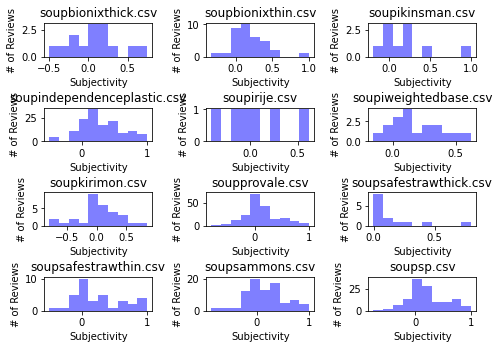

In [123]:
fig = plt.figure()
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    sub_data_frame['subjectivity'] = sub_data_frame['review'].apply(pol)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame.subjectivity, num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Subjectivity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.5, hspace = 1.5)

In [124]:
from wordcloud import WordCloud, STOPWORDS

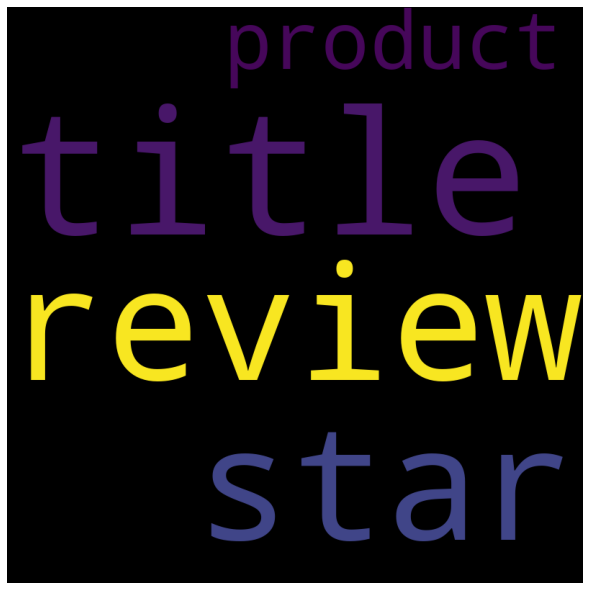

In [125]:
c = 1
comment_words = '' 
stopwords = set(STOPWORDS) 
    
for review in all_reviews_df:
    
    review = str(review)
    
    tokens = review.split()
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
    

In [126]:
import seaborn as sns

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'soupsp.csv')

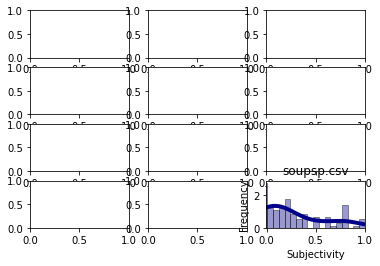

In [127]:
fig = plt.figure()
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
    
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    sub_data_frame['subjectivity'] = sub_data_frame['review'].apply(pol)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
sns.distplot(sub_data_frame.subjectivity, hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title(product)